# Preliminary setup and data exploration

In [1]:
import os

os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(100)
np.random.seed(100)

In [3]:
from src.agents import *

In [4]:
# data = pd.read_csv('data/10000dataset.csv') # easy
data = pd.read_csv("data/yahoo_reduced_arms.csv")  # harder

# Reshuffle data
data = data.sample(frac=1, random_state=100)
data = data.reset_index()

In [5]:
features_columns = []

In [6]:
n_features = 0
for column in data.columns:
    try:
        _ = int(column)
        features_columns.append(column)
    except:
        pass
n_features = len(features_columns)

In [7]:
# Number of arms
n_arms = data["selected_arm"].max() + 1
n_arms = int(n_arms)
n_arms

22

In [8]:
data

,index,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,selected_arm,reward,probability
0,6587,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,0,0.045455
1,28273,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,0,0.045455
2,39680,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,20,0,0.045455
3,35317,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,17,0,0.045455
4,35601,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,8,0,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786,16304,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,20,0,0.045455
45787,79,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,0,0.045455
45788,12119,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,13,0,0.045455
45789,14147,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0.045455


In [9]:
data.sample(n=5, random_state=100)

,index,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,selected_arm,reward,probability
6587,28252,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,0,0.045455
28273,22553,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0.045455
39680,45324,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0.045455
35317,2154,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,19,0,0.045455
35601,37921,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0.045455


In [10]:
data.shape

(45791, 140)

There are 22 different arms. They seem to have been chosen uniformly randomly:

In [11]:
data["selected_arm"].describe()

count    45791.000000
mean        10.420825
std          6.357193
min          0.000000
25%          5.000000
50%         10.000000
75%         16.000000
max         21.000000
Name: selected_arm, dtype: float64

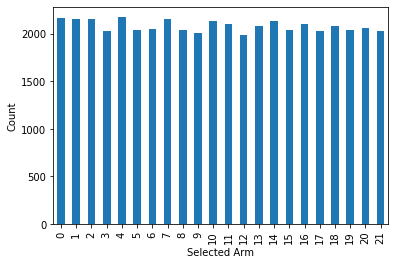

In [12]:
data["selected_arm"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Selected Arm")
plt.ylabel("Count")
plt.show()

The reward is a Bernoulli distribution:

In [13]:
data["reward"].describe()

count    45791.000000
mean         0.019109
std          0.136908
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: reward, dtype: float64

The reward expectancy depends on the arm chosen:

Text(0.5, 0, 'Selected Arm')

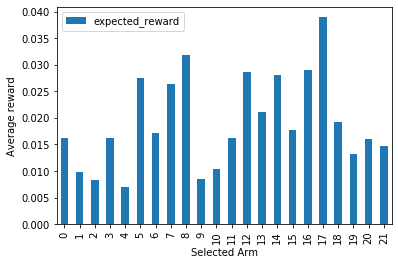

In [14]:
expected_reward = (
    data.groupby("selected_arm")
    .agg({"reward": "mean"})
    .rename({"reward": "expected_reward"}, axis=1)
)
expected_reward.plot(kind="bar")
plt.ylabel("Average reward")
plt.xlabel("Selected Arm")

In [15]:
data.groupby("selected_arm").agg({"reward": "mean"}).sort_values(
    "reward", ascending=False
)

,reward
selected_arm,
17,0.039012
8,0.031832
16,0.029006
12,0.028658
14,0.028169
5,0.027518
7,0.026450
13,0.021164
18,0.019222


All 136 features are bernoulli

# Using PCA to lower the number of dimensions

In [16]:
n_pca = 4

from sklearn import decomposition

pca = decomposition.PCA(n_components=4)
X = pca.fit_transform(data[features_columns])

data = pd.concat([pd.DataFrame(X), data[["selected_arm", "reward"]]], axis=1)
n_features = n_pca
features_columns = range(n_pca)

In [17]:
data

,0,1,2,3,selected_arm,reward
0,-0.760240,0.525906,-0.034591,-0.121774,21,0
1,-0.853298,0.362416,0.740505,-0.057254,9,0
2,-0.201052,0.116955,-0.795137,-0.724772,20,0
3,-0.182461,-0.728446,-0.233059,-0.077767,17,0
4,-0.437755,0.837091,-0.761695,0.697332,8,0
...,...,...,...,...,...,...
45786,0.120877,-0.467143,-0.921093,-0.709538,20,0
45787,-0.863846,0.421639,0.821669,-0.029096,18,0
45788,-0.472801,0.798550,-0.697368,0.631495,13,0
45789,3.074265,0.516652,1.220113,-0.121016,10,0


In [18]:
# plt.scatter(data[0], data[1])

# Defining a base Agent other will be based upon

These are the basic properties of a multi-armed bandit.

In [19]:
??Agent

Init signature: Agent(n_arms)
Source:        
class Agent():
    """Base properties of all multi-armed bandits."""
    def __init__(self, n_arms):
        """
        n_arms: int
            Number of arms
        """
        self.n_arms = n_arms
        self.tries = np.zeros(n_arms)
        self.successes = np.zeros(n_arms)
        
    @property
    def _total_tries(self): 
        return self.tries.sum()
    
    def add_observation(self, arm, reward):
        """An observation consists of a pair `(arm, reward)`.
        arm: int
            Chosen arm of the observation
        reward: float
            Reward of the observation
        """
        self.tries[arm] += 1
        self.successes[arm] += reward
    
    def select_arm(self):
        """Placeholder way of selecting an arm."""
        arm = self._total_tries % self.n_arms
        return arm
File:           ~/Repos/bandits/src/agents.py
Type:           type
Subclasses:     GreedyExploreFirst, EpsilonGreedy, UCB1, BayesUCB,

# Contextual Agent

In [20]:
class ContextualAgent(Agent):
    """Base properties of all contextual multi-armed bandits."""

    def __init__(self, n_arms, n_features):
        """
        n_arms: int
            Number of arms
        n_features: int
            Number of features
        """
        super().__init__(n_arms)
        self.n_features = n_features

    def add_observation(self, arm, reward, X):
        """A contextual observation consists of a triplet `(arm, reward, X)`.
        arm: int
            Chosen arm of the observation
        reward: float
            Reward of the observation
        X: np.array
            Features of the observation. Shape (n_features, 1).
        """
        super().add_observation(arm, reward)

    def select_arm(self, X):
        """Placeholder way of selecting an arm contextually.
        X: np.array
            Features of the observation. Shape (n_features, 1).
        """
        arm = self._total_tries % self.n_arms
        return arm

# Implementing LinUCB

In [21]:
class LinUCB(ContextualAgent):
    """LinUCB with disjoint linear models for each arm."""

    def __init__(self, n_arms, n_features, alpha=1):
        super().__init__(n_arms, n_features)
        self.alpha = alpha
        self._A = np.array(
            [np.identity(n_features) for arm in range(n_arms)]
        )  # One n_features x n_feature matrix per arm
        self._b = np.array(
            [np.zeros([n_features, 1]) for arm in range(n_arms)]
        )  # One n_features x 1 vector per arm

    def add_observation(self, arm, reward, X):
        """
        arm: int
            Chosen arm of the observation
        reward: float
            Reward of the observation
        X: np.array
            Features of the observation. Shape (n_features, 1).
        """
        super().add_observation(arm, reward, X)
        self._A[arm] += np.dot(X, X.T)
        self._b[arm] += reward * X

    @property
    def _Ainv_theta(self):
        A_inv = [np.linalg.inv(self._A[arm]) for arm in range(n_arms)]
        theta = [np.dot(A_inv[arm], self._b[arm]) for arm in range(n_arms)]
        return A_inv, theta

    def _get_UCB(self, X):
        """
        X: np.array
            Features of the observation. Shape (n_features, 1).
        """
        A_inv, theta = self._Ainv_theta
        UCB = [
            np.dot(theta[arm].T, X)
            + self.alpha * np.sqrt(np.dot(X.T, np.dot(A_inv[arm], X)))
            for arm in range(n_arms)
        ]
        UCB = np.array(UCB)
        return UCB

    def select_arm(self, X):
        """
        X: np.array
            Features of the observation. Shape (n_features, 1).
        """
        UCB = self._get_UCB(X)
        arm = argmax(UCB)
        return arm

# Using real data to simulate the Agent's environment

In [22]:
agent = LinUCB(n_arms=n_arms, n_features=n_features, alpha=1)

For every row of the data, we only use the observation if the arm selected for the observation is the same as the arm chosen by our Agent.

In [23]:
%%time
Rewards = []
Selected_Arms = []
Indexes = []
for index in range(len(data)):
    X = data.loc[index, features_columns]
    X = X.values.reshape([-1, 1])
    selected_arm = agent.select_arm(X)
    if selected_arm == data.loc[index, "selected_arm"]:
        reward = data.loc[index, "reward"]
        agent.add_observation(selected_arm, reward, X)
        Rewards.append(reward)
        Selected_Arms.append(selected_arm)
        Indexes.append(index)

Cumulative_Reward = np.array(Rewards).cumsum()

CPU times: user 3min 4s, sys: 1min 32s, total: 4min 37s
Wall time: 1min 9s


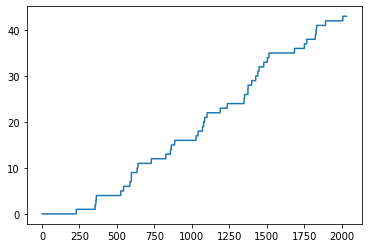

In [24]:
plt.plot(Cumulative_Reward)

In [25]:
pd.Series(Selected_Arms).value_counts()

17    136
18    129
14    121
16    118
3     105
20    102
8     100
7      99
11     98
10     88
9      88
5      87
13     86
2      82
15     81
21     75
1      74
0      74
4      73
12     73
6      72
19     72
dtype: int64

In [26]:
Cumulative_Reward[-1]

43

Plotting results for different values of alpha

CPU times: user 40min 20s, sys: 20min 45s, total: 1h 1min 6s
Wall time: 15min 16s


Text(0.5, 1.0, 'Cumulative Reward for different values of alpha')

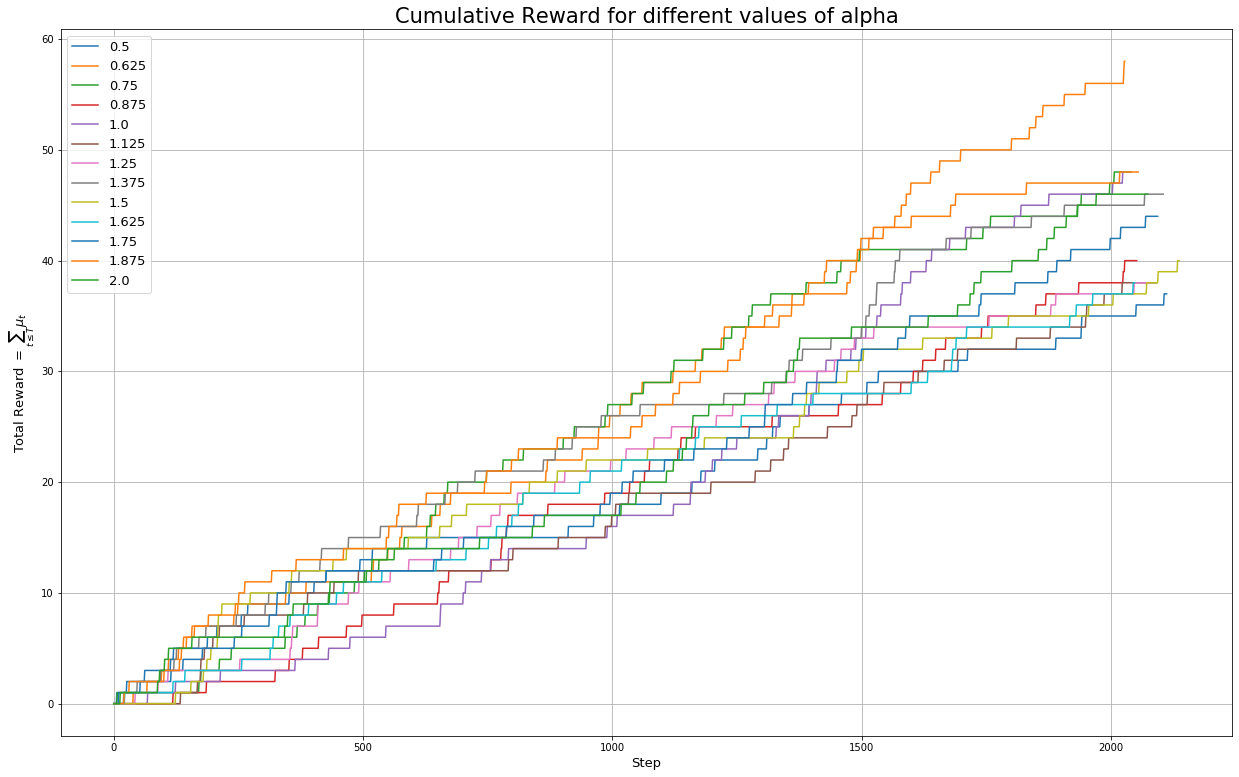

In [27]:
%%time
plt.figure(figsize=(21, 13))

Reward_Per_Alpha = []
for alpha in np.linspace(0.5, 2, 13):
    agent = LinUCB(n_arms=n_arms, n_features=n_features, alpha=alpha)
    Rewards = []
    for index in range(len(data)):
        X = data.loc[index, features_columns]
        X = X.values.reshape([-1, 1])
        selected_arm = agent.select_arm(X)
        if selected_arm == data.loc[index, "selected_arm"]:
            reward = data.loc[index, "reward"]
            agent.add_observation(selected_arm, reward, X)
            Rewards.append(reward)

    Cumulative_Reward = np.array(Rewards).cumsum()
    plt.plot(Cumulative_Reward, label=f"{alpha}")
    Reward_Per_Alpha.append(Cumulative_Reward[-1])

plt.legend(fontsize=13)
plt.xlabel("Step", fontsize=13)
plt.ylabel("Total Reward $= \sum_{t \leq T} \mu_t$", fontsize=13)
plt.grid()
plt.title("Cumulative Reward for different values of alpha", fontsize=21)

Text(0.5, 1.0, 'Cumulative Reward for different values of alpha')

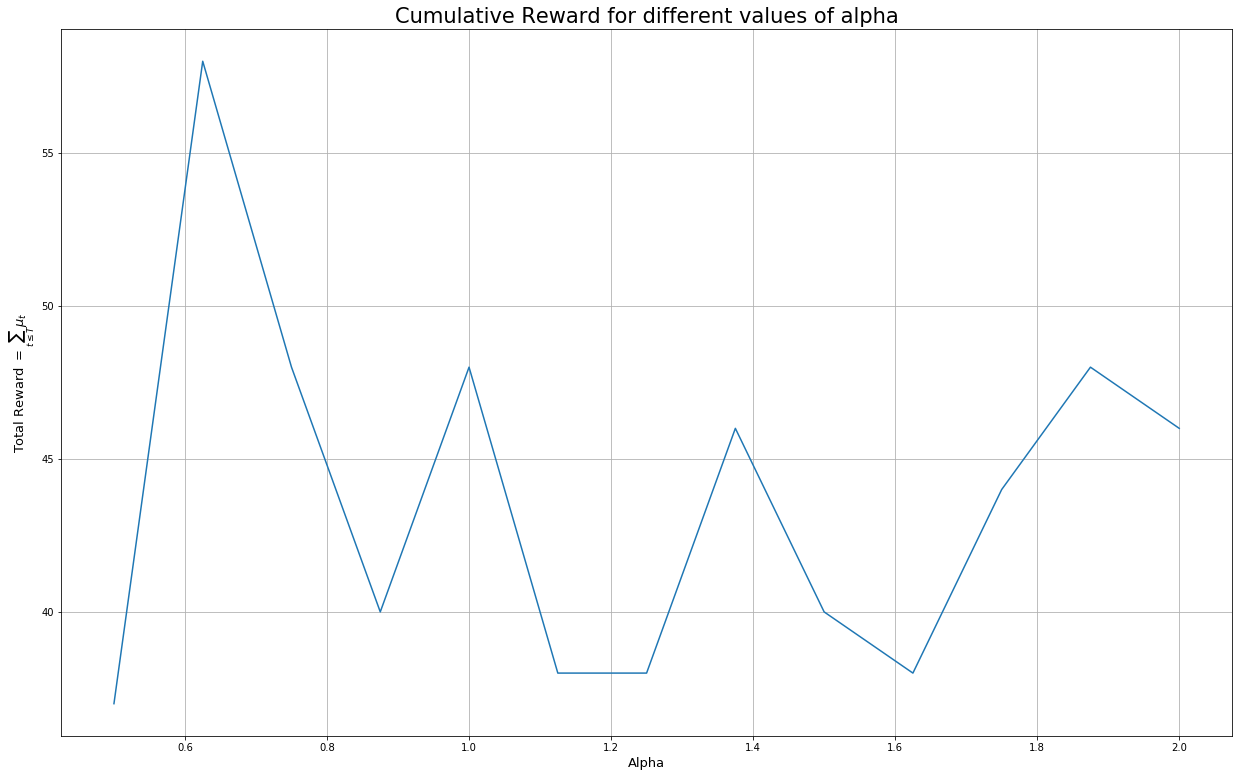

In [28]:
plt.figure(figsize=(21, 13))
plt.plot(np.linspace(0.5, 2, 13), Reward_Per_Alpha)
plt.xlabel("Alpha", fontsize=13)
plt.ylabel("Total Reward $= \sum_{t \leq T} \mu_t$", fontsize=13)
plt.grid()
plt.title("Cumulative Reward for different values of alpha", fontsize=21)

Text(0.5, 1.0, 'Last 500 click through rate')

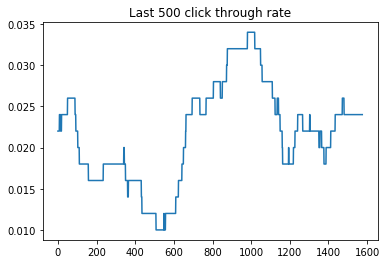

In [29]:
k = 500
last_k_ctr = np.convolve(np.array(Rewards), np.ones(k, dtype=int), "valid") / k
plt.plot(last_k_ctr)
plt.title(f"Last {k} click through rate")

# Implementing LinThompsonSampling (LinTS)

In [21]:
# class LinTS(ContextualAgent):
#     """LinUCB with disjoint linear models for each arm."""
#     def __init__(self, n_arms, n_features, alpha=1):
#         super().__init__(n_arms, n_features)
#         self.alpha = alpha
#         self._A = np.array([np.identity(n_features) for arm in range(n_arms)]) # One n_features x n_feature matrix per arm
#         self._b = np.array([np.zeros([n_features, 1]) for arm in range(n_arms)]) # One n_features x 1 vector per arm

#     def add_observation(self, arm, reward, X):
#         """
#         arm: int
#             Chosen arm of the observation
#         reward: float
#             Reward of the observation
#         X: np.array
#             Features of the observation. Shape (n_features, 1).
#         """
#         super().add_observation(arm, reward, X)
#         self._A[arm] += np.dot(X, X.T)
#         self._b[arm] += reward * X

#     @property
#     def _Ainv_theta(self):
#         A_inv = [np.linalg.inv(self._A[arm]) for arm in range(n_arms)]
#         theta = [np.dot(A_inv[arm], self._b[arm]) for arm in range(n_arms)]
#         return A_inv, theta

#     def _get_UCB(self, X):
#         """
#         X: np.array
#             Features of the observation. Shape (n_features, 1).
#         """
#         A_inv, theta = self._Ainv_theta
#         UCB = [np.dot(theta[arm].T, X) +  self.alpha * np.sqrt(np.dot(X.T, np.dot(A_inv[arm], X))) for arm in range(n_arms)]
#         UCB = np.array(UCB)
#         return UCB

#     def select_arm(self, X):
#         """
#         X: np.array
#             Features of the observation. Shape (n_features, 1).
#         """
#         UCB = self._get_UCB(X)
#         arm = argmax(UCB)
#         return arm